# Analysis
Compare: 
Groups:1-HC and 2-CDI
Gender: 1-Male and 2-Female

В файле RMF результаты правильных (1) и неправильных (0)  ответов при определении эмоций в клипах из фильмов для контрольной группы HC и для CDI пациентов

Картинки типа такой


<img src="https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/matplotlib_grouped_bar_plot_6_0.png" />

или такой
https://www.dezyre.com/recipes/generate-bar-plot-using-pandas-dataframe

просто хочу сделать один график для средних с усами SEM например для 3-х эмоций

# Ниже можно наблюдать терзания измученного сознания


Groups 1-HC and 2-CDI

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
df = pd.read_csv('RMF.csv')
df.head()

,id,group,age,sex,overcome,pleased,enjoying,embarassed,unassuming,exasperated,...,bitter,disconcerted,reflective,belittled,resigned,awkward,worried,troubled,concerned,total_cor
0,X01,2,43,2,0,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,7
1,X02,2,53,2,1,1,1,1,1,0,...,0,0,1,0,1,0,1,0,1,11
2,X03,2,44,1,0,0,1,1,1,0,...,1,0,0,1,0,0,1,0,0,9
3,X04,2,51,1,0,1,1,0,1,1,...,1,0,1,0,0,1,0,1,1,12
4,X05,2,53,2,1,1,0,0,1,0,...,0,0,0,0,1,1,0,0,1,10


In [46]:
df["group"].value_counts()

2    10
1     9
Name: group, dtype: int64

In [10]:
melted_df = pd.melt(df, id_vars=['id','group','age','sex','total_cor'], var_name='emotion', value_name = "guess")

In [11]:
melted_df.sample(10)

,id,group,age,sex,total_cor,emotion,guess
178,X08,2,29,1,9,resentful,0
322,Z11,1,51,2,14,belittled,1
307,X04,2,51,1,12,belittled,0
143,Z03,1,24,1,13,annoyed,1
207,Z10,1,45,1,16,disliking,1
160,X09,2,55,1,12,smug,0
83,X08,2,29,1,9,unassuming,1
339,Z09,1,51,1,11,resigned,1
195,X06,2,63,1,7,disliking,0
397,Z10,1,45,1,16,troubled,0


In [44]:
melted_df["group"].value_counts()

2    220
1    198
Name: group, dtype: int64

In [41]:
score=melted_df.groupby(['group','emotion'])['guess'].value_counts(normalize=True).rename('percentage').mul(100)
score

group  emotion     guess
1      annoyed     0        66.666667
                   1        33.333333
       awkward     0        55.555556
                   1        44.444444
       belittled   1        55.555556
                              ...    
2      troubled    1        20.000000
       unassuming  1        90.000000
                   0        10.000000
       worried     1        60.000000
                   0        40.000000
Name: percentage, Length: 82, dtype: float64

In [20]:
score=melted_df.groupby(['group','emotion'])['guess'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
score

,group,emotion,guess,percentage
0,1,annoyed,0,66.666667
1,1,annoyed,1,33.333333
2,1,awkward,0,55.555556
3,1,awkward,1,44.444444
4,1,belittled,1,55.555556
...,...,...,...,...
77,2,troubled,1,20.000000
78,2,unassuming,1,90.000000
79,2,unassuming,0,10.000000
80,2,worried,1,60.000000


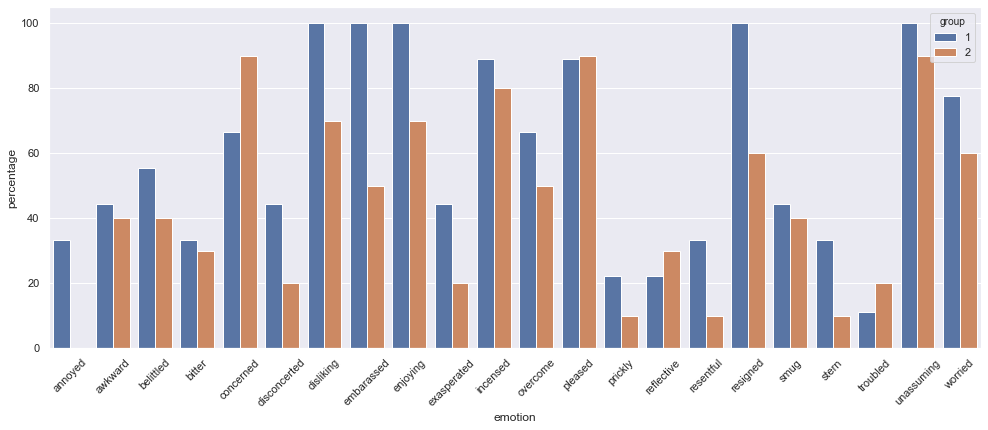

In [38]:
sns.set(rc={'figure.figsize':(16.7,6.27)})
g = sns.barplot(x = "emotion", hue="group", y = "percentage", data = score[score["guess"]==1])
plt.xticks(rotation=45);